In [1]:
import networkx as nx
import random
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

### Import CTA data for the graph

In [2]:
g = nx.read_gml('cta.gml')
node_coords = {}
for n in g:
    node_coords[n] = g.nodes[n]['pos']


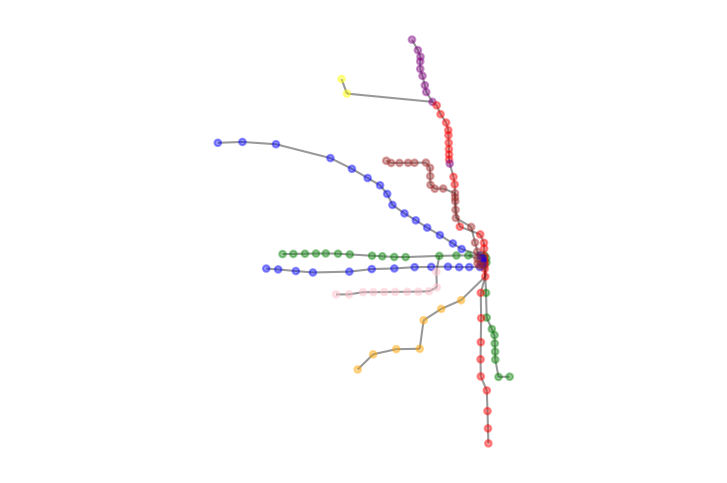

In [3]:
fig, ax = plt.subplots(dpi=150)
nx.draw(g, node_coords, 
        ax=ax, alpha=0.4, 
        node_size=10, 
        node_color=[g.nodes[i]['nodecolor'] for i in g.nodes])
plt.axis('equal')
plt.grid(which='both')
plt.show()

['40870', '41510', '40870'] 0
40870 41510
['40870', '41510', '40870'] 0
41010 41510
['40870', '41510', '40870'] 0
41480 41510
['40870', '41510', '40870'] 0
40090 41510
['40870', '41510', '40870'] 0
41500 41510
['40870', '41510', '40870'] 0
41460 41510
['40870', '41510', '40870'] 0
41440 41510
['40870', '41510', '40870'] 0
41310 41510
['40870', '41510', '40870'] 0
40360 41510
['40870', '41510', '40870'] 0
41320 41510
['40870', '41510', '40870'] 0
41220 41510
['40870', '41510', '40870'] 0
40660 41510
['40870', '41510', '40870'] 0
40800 41510
['40870', '41510', '40870'] 0
40710 41510
['40870', '41510', '40870'] 0
40460 41510
['40870', '41510', '40870'] 0
40380 41510
['40870', '41510', '40870'] 0
41160 41510
['40870', '41510', '40870'] 0
41510 41510
['40870', '41510', '40870'] 1
41160 40870
['40870', '41510', '40870'] 1
40380 40870
['40870', '41510', '40870'] 1
40460 40870
['40870', '41510', '40870'] 1
40710 40870
['40870', '41510', '40870'] 1
40800 40870
['40870', '41510', '40870'] 1
4066

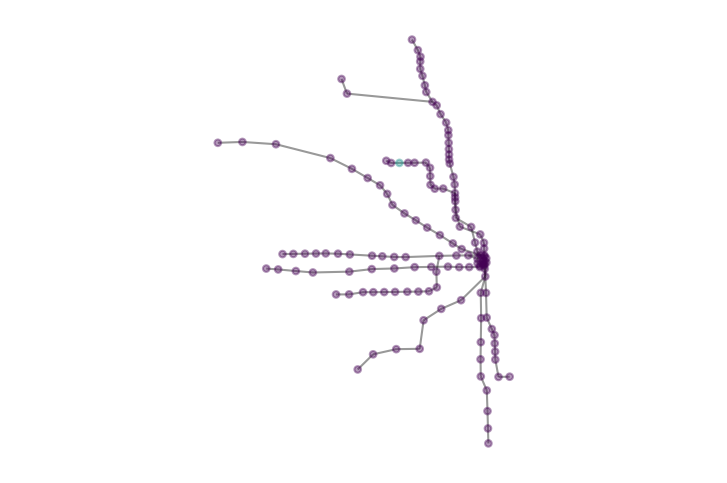

In [42]:
timesteps = 100
n_simulations = 1
n_passengers = 1

class Passenger:
    def __init__(self):
        self.fees = 0
        self.transit_time = 0
        
        
def initialize():
    global g, nextg, passengers
    
    g = nx.read_gml('cta.gml')
    
    # number of passengers at a stop
    nx.set_node_attributes(g, 0, 'population')
    # passenger capacity of a stop
    nx.set_node_attributes(g, 10, 'capacity')
    
    passengers = []
    for i in range(n_passengers):
        # assign a random direct-path itinerary
        p = Passenger()
        p.home = random.choice(list(g.nodes))
        p.work = random.choice(list(g.nodes))
        p.itinerary = [p.home, p.work, p.home]
        p.itinerary_index = 0
        p.current = p.itinerary[p.itinerary_index]
        p.destination = p.itinerary[p.itinerary_index + 1]
        passengers.append(p)
        
        # populate the node
        g.nodes[p.current]['population'] += 1
    
    
    nextg = g.copy()
    next_passengers = passengers.copy()
        
        
def update():
    global g, nextg, passengers
    
    for i in range(len(next_passengers)):
        p = passengers[i]
        p_next = next_passengers[i]
        
        if p.itinerary_index == len(p.itinerary)-1:
            print('trip complete')
            continue
        
        else:
            print(p.itinerary, p.itinerary_index)
            print(p.current, p.destination)
            
            # update destination if necessary
            if p.current == p.destination:
                p.itinerary_index = p.itinerary_index + 1
                p.destination = p.itinerary[(p.itinerary_index + 1)%2]

            path = nx.shortest_path(g, p.current, p.destination)
#             print("path = ", path)
            next_node = path[1]
    
            p_next.current = next_node
            
            # population balance step
            nextg.nodes[p.current]['population'] -= 1
            nextg.nodes[p_next.current]['population'] += 1
            p_next.transit_time = p.transit_time + 1
        
    passengers = next_passengers
    
    
#                 if g.nodes[next_node]['population'] < g.nodes[next_node]['capacity']:

        # track fees and transit time
        # TODO: add fee only if starting, stopping, changing lines(?)
#         p.fees += 1

        # TODO: add transit time 5x penalty for changing lines(?)

timesteps = 100
initialize()
for t in range(timesteps):
    update()


# save station coords as a dict for visualization
node_coords = {}
for n in g:
    node_coords[n] = g.nodes[n]['pos']
    
fig, ax = plt.subplots(dpi=150)
nx.draw(g, pos=node_coords, cmap=cm.viridis,
        vmin=0, vmax=2, ax=ax, alpha=0.4, node_size=10, 
        node_color=[g.nodes[i]['population'] for i in g.nodes])
plt.axis('equal')
plt.grid(which='both')
plt.show()

at each timestep:
    - move toward next destination
    - add fare
    - add time
    - if desination reached, update to next destination

https://towardsdatascience.com/i-built-the-t-with-python-and-revamped-it-632127364f4e
    
- add 5 minute penalty for transfers
- if population exceeds capacity, wait

In [13]:
timesteps = 100
n_simulations = 3
n_passengers = 50

node_pop_array = np.zeros([n_nodes, n_simulations])

for i in range(0, n_simulations):
    initialize()
    print(i)
    for j in range(1, timesteps):
        update()
    
    failed_fracs_array[:, i] = failed_fracs
    blackout_sizes.append(failed_fracs[-1])

print(blackout_sizes)

plt.figure(dpi=120)
plt.hist(blackout_sizes, bins=20)
plt.show()

NameError: name 'n_nodes' is not defined

In [39]:
timesteps = 100
n_simulations = 1
n_passengers = 1

class Passenger:
    def __init__(self):
        self.fees = 0
        self.transit_time = 0
        
        
def initialize():
    global g, nextg, passengers
    
    g = nx.read_gml('cta.gml')
    
    # number of passengers at a stop
    nx.set_node_attributes(g, 0, 'population')
    # passenger capacity of a stop
    nx.set_node_attributes(g, 10, 'capacity')
    
    passengers = []
    for i in range(n_passengers):
        # assign a random direct-path itinerary
        p = Passenger()
        p.home=random.choice(list(g.nodes))
        p.work=random.choice(list(g.nodes))
        p.itinerary = [p.home, p.work, p.home]
        p.itinerary_index = 0
        p.current = p.itinerary[p.itinerary_index]
        p.destination = p.itinerary[p.itinerary_index + 1]
        passengers.append(p)
        
        # populate the node
        g.nodes[p.current]['population'] += 1
    
    
    nextg = g.copy()
    next_passengers = passengers.copy()
        
        
def update():
    global g, nextg, passengers

    nextg = g.copy()
    next_passengers = passengers.copy()
    
    for i in range(len(next_passengers)):
        p = passengers[i]
        
#         print(t, vars(p))
        if p.itinerary_index == len(p.itinerary)-1:
            print('trip complete')
            continue
        
        else:
            print(p.itinerary, p.itinerary_index)
            print(p.current, p.destination)
            # update destination if necessary
            if p.current == p.destination:
                p_next.itinerary_index = p.itinerary_index + 1
                p_next.destination = p_next.itinerary[p_next.itinerary_index + 1]

            path = nx.shortest_path(g, p.current, p_next.destination)
#             print("path = ", path)
            next_node = path[1]

            p_next.current = next_node
            
            # population balance step
            nextg.nodes[p.current]['population'] -= 1
            nextg.nodes[p_next.current]['population'] += 1
            p_next.transit_time = p.transit_time + 1
        
    passengers = next_passengers
    
    
#                 if g.nodes[next_node]['population'] < g.nodes[next_node]['capacity']:

        # track fees and transit time
        # TODO: add fee only if starting, stopping, changing lines(?)
#         p.fees += 1

        # TODO: add transit time 5x penalty for changing lines(?)

timesteps = 100
initialize()
for t in range(timesteps):
    update()


# save station coords as a dict for visualization
node_coords = {}
for n in g:
    node_coords[n] = g.nodes[n]['pos']
    
fig, ax = plt.subplots(dpi=150)
nx.draw(g, pos=node_coords, cmap=cm.viridis,
        vmin=0, vmax=2, ax=ax, alpha=0.4, node_size=10, 
        node_color=[g.nodes[i]['population'] for i in g.nodes])
plt.axis('equal')
plt.grid(which='both')
plt.show()

['41060', '40920', '41060'] 0
41060 40920


NameError: name 'p_next' is not defined